<a href="https://colab.research.google.com/github/CosmoKnight786/Skin_cancer_Classification_Soft_attention/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/15054752730_fcf54d475e_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5970869550_d7d9fabebd_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14678298676_6db8831ee6_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6866250080_ae80df0cd5_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3912497870_a2f91c3a65_n.jpg')]

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg')]

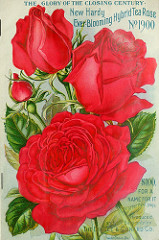

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

#assign a no. to each class
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg')

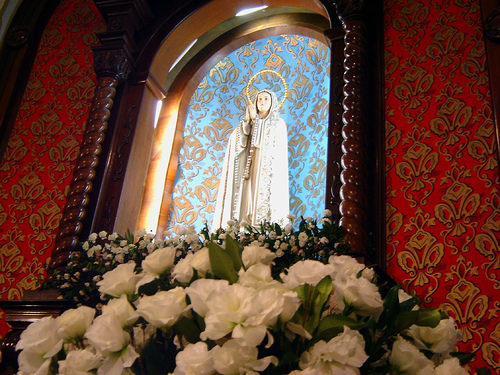

In [ ]:
PIL.Image.open(str(flowers_images_dict['roses'][0]))

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

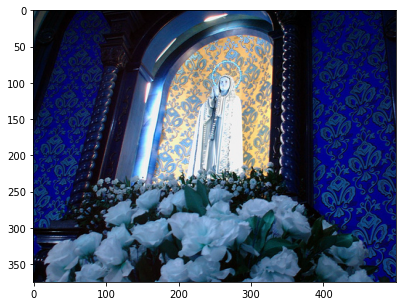

In [ ]:
  
plt.figure(figsize = (20,5))
  plt.imshow(img)

In [ ]:
X, y = [], []
img_height=180
img_width=180
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) 
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 5s 46ms/step - loss: 1.3370 - accuracy: 0.4182
Epoch 2/30
86/86 [==============================] - 4s 46ms/step - loss: 0.9794 - accuracy: 0.6137
Epoch 3/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8378 - accuracy: 0.6817
Epoch 4/30
86/86 [==============================] - 4s 46ms/step - loss: 0.6538 - accuracy: 0.7551
Epoch 5/30
86/86 [==============================] - 4s 46ms/step - loss: 0.4468 - accuracy: 0.8438
Epoch 6/30
86/86 [==============================] - 4s 47ms/step - loss: 0.2455 - accuracy: 0.9222
Epoch 7/30
86/86 [==============================] - 4s 46ms/step - loss: 0.1799 - accuracy: 0.9437
Epoch 8/30
86/86 [==============================] - 4s 46ms/step - loss: 0.0905 - accuracy: 0.9749
Epoch 9/30
86/86 [==============================] - 4s 46ms/step - loss: 0.0521 - accuracy: 0.9862
Epoch 10/30
86/86 [==============================] - 4s 47ms/step - loss: 0.0303 - accuracy: 0.9924
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 35ms/step - loss: 2.2336 - accuracy: 0.6765


[2.2335875034332275, 0.6764705777168274]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)      

In [ ]:
predictions = model.predict(X_test_scaled)
predictions


array([[15.532902  , 33.346054  , -0.60478425, 17.405975  ,  1.7010282 ],
       [24.107622  ,  2.8798    ,  5.4578133 ,  3.2117171 , 19.136395  ],
       [ 3.0435247 ,  2.894076  , 16.112165  , -5.469041  , -0.9773258 ],
       ...,
       [-2.937189  , -6.8577366 ,  6.9776983 , 20.357191  ,  8.279034  ],
       [ 9.726977  ,  6.155997  ,  5.4441905 , -2.8869863 , -0.8943273 ],
       [-2.8945475 , -5.054017  , 14.033211  , 19.585463  , -0.36162496]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.8358881e-08, 9.9999988e-01, 1.8002692e-15, 1.1948454e-07,
       1.8060929e-14], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

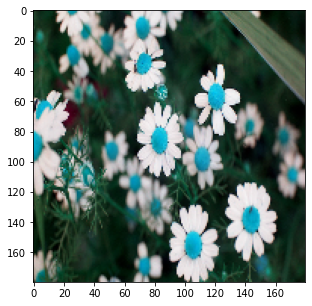

In [ ]:
plt.figure(figsize = (20,5))
plt.imshow(X_test[0])

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 8s 54ms/step - loss: 1.2646 - accuracy: 0.4615
Epoch 2/30
86/86 [==============================] - 5s 52ms/step - loss: 1.0151 - accuracy: 0.5952
Epoch 3/30
86/86 [==============================] - 5s 52ms/step - loss: 0.9239 - accuracy: 0.6450
Epoch 4/30
86/86 [==============================] - 4s 52ms/step - loss: 0.8498 - accuracy: 0.6632
Epoch 5/30
86/86 [==============================] - 4s 52ms/step - loss: 0.7925 - accuracy: 0.6962
Epoch 6/30
86/86 [==============================] - 4s 52ms/step - loss: 0.7498 - accuracy: 0.7169
Epoch 7/30
86/86 [==============================] - 4s 52ms/step - loss: 0.7270 - accuracy: 0.7227
Epoch 8/30
86/86 [==============================] - 4s 52ms/step - loss: 0.6814 - accuracy: 0.7398
Epoch 9/30
86/86 [==============================] - 4s 52ms/step - loss: 0.6491 - accuracy: 0.7496
Epoch 10/30
86/86 [==============================] - 4s 52ms/step - loss: 0.6174 - accuracy: 0.7631
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 28ms/step - loss: 0.9189 - accuracy: 0.7331


[0.9188790321350098, 0.7331154942512512]